In [1]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l 

In [63]:
fair_probs = torch.ones([6]) / 6 
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [94]:
counts = multinomial.Multinomial(60000,fair_probs).sample((4,))
a=  counts / 60000
print(a)

tensor([[0.1656, 0.1662, 0.1692, 0.1640, 0.1692, 0.1657],
        [0.1676, 0.1661, 0.1678, 0.1674, 0.1639, 0.1672],
        [0.1666, 0.1684, 0.1702, 0.1642, 0.1655, 0.1650],
        [0.1672, 0.1672, 0.1687, 0.1651, 0.1646, 0.1673]])


tensor([[0.2000, 0.1000, 0.1000, 0.0000, 0.3000, 0.3000],
        [0.1000, 0.1500, 0.1500, 0.1000, 0.2000, 0.3000],
        [0.1333, 0.1333, 0.1333, 0.1333, 0.2000, 0.2667],
        ...,
        [0.1677, 0.1653, 0.1622, 0.1689, 0.1643, 0.1717],
        [0.1679, 0.1649, 0.1625, 0.1687, 0.1639, 0.1719],
        [0.1680, 0.1650, 0.1622, 0.1688, 0.1640, 0.1720]])


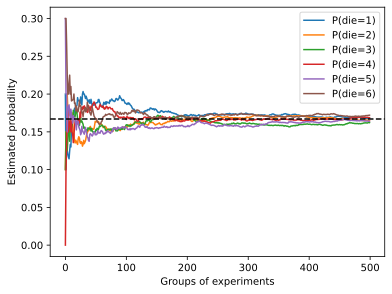

In [93]:
counts = multinomial.Multinomial(10,fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim= 1,keepdims=True)
print(estimates)
d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),label=("P(die="+ str(i + 1) + ")"))
d2l.plt.axhline(y=0.167,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probadility')
d2l.plt.legend()
